In [34]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [35]:
classes = ['pink primrose',
 'hard-leaved pocket orchid',
 'canterbury bells',
 'sweet pea',
 'english marigold',
 'tiger lily',
 'moon orchid',
 'bird of paradise',
 'monkshood',
 'globe thistle',
 'snapdragon',
 "colt's foot",
 'king protea',
 'spear thistle',
 'yellow iris',
 'globe-flower',
 'purple coneflower',
 'peruvian lily',
 'balloon flower',
 'giant white arum lily',
 'fire lily',
 'pincushion flower',
 'fritillary',
 'red ginger',
 'grape hyacinth',
 'corn poppy',
 'prince of wales feathers',
 'stemless gentian',
 'artichoke',
 'sweet william',
 'carnation',
 'garden phlox',
 'love in the mist',
 'mexican aster',
 'alpine sea holly',
 'ruby-lipped cattleya',
 'cape flower',
 'great masterwort',
 'siam tulip',
 'lenten rose',
 'barbeton daisy',
 'daffodil',
 'sword lily',
 'poinsettia',
 'bolero deep blue',
 'wallflower',
 'marigold',
 'buttercup',
 'oxeye daisy',
 'common dandelion',
 'petunia',
 'wild pansy',
 'primula',
 'sunflower',
 'pelargonium',
 'bishop of llandaff',
 'gaura',
 'geranium',
 'orange dahlia',
 'pink-yellow dahlia',
 'cautleya spicata',
 'japanese anemone',
 'black-eyed susan',
 'silverbush',
 'californian poppy',
 'osteospermum',
 'spring crocus',
 'bearded iris',
 'windflower',
 'tree poppy',
 'gazania',
 'azalea',
 'water lily',
 'rose',
 'thorn apple',
 'morning glory',
 'passion flower',
 'lotus lotus',
 'toad lily',
 'anthurium',
 'frangipani',
 'clematis',
 'hibiscus',
 'columbine',
 'desert-rose',
 'tree mallow',
 'magnolia',
 'cyclamen',
 'watercress',
 'canna lily',
 'hippeastrum',
 'bee balm',
 'ball moss',
 'foxglove',
 'bougainvillea',
 'camellia',
 'mallow',
 'mexican petunia',
 'bromelia',
 'blanket flower',
 'trumpet creeper',
 'blackberry lily']

len(classes)

102

Datataset

In [36]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

num_workers = 0
batch_size = 20
valid_size = 0.2

data_dir = "dataset/flower_data/"

transform = transforms.Compose([transforms.Resize(32),
                               transforms.RandomResizedCrop(256),
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(10),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data = datasets.ImageFolder(data_dir+"/train",transform=transform)
test_data = datasets.ImageFolder(data_dir+"/valid",transform=transform)


num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
train_idx,valid_idx = indices[split:],indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler =SubsetRandomSampler(valid_idx)


train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=train_sampler,
                                          num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=valid_sampler,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

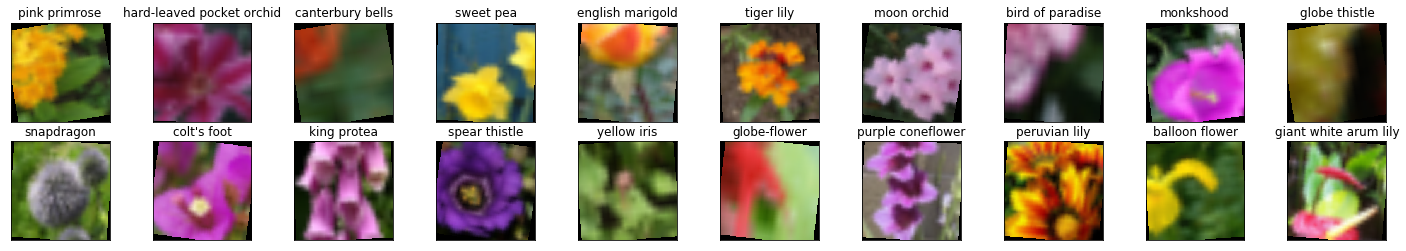

In [37]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[idx])

In [38]:
import torch.nn as nn
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        # convolutions
        self.conv1 = nn.Conv2d(3,16,3,padding=1)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.conv3 = nn.Conv2d(32,64,3,padding=1)
        
        # Max-pool
        self.pool = nn.MaxPool2d(2,2)
        
        # Dropout
        self.dropout = nn.Dropout(p=0.3)
        # Linear Layer
        self.fc1 = nn.Linear(32*32*64,1024)
        self.fc2 = nn.Linear(1024,512)
        
        # output
        self.out = nn.Linear(512,102)
        
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1,32*32*64)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        
        out = self.out(x)
        
        return out
    
    
model =Network()
print(model)

if train_on_gpu:
    model.cuda()

Network(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3)
  (fc1): Linear(in_features=65536, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=102, bias=True)
)


In [39]:


# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [44]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_augmented.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 3.610614 	Validation Loss: 0.905862
Validation loss decreased (inf --> 0.905862).  Saving model ...
Epoch: 2 	Training Loss: 3.606681 	Validation Loss: 0.906976
Epoch: 3 	Training Loss: 3.606238 	Validation Loss: 0.906795
Epoch: 4 	Training Loss: 3.604187 	Validation Loss: 0.906823
Epoch: 5 	Training Loss: 3.603753 	Validation Loss: 0.907023
Epoch: 6 	Training Loss: 3.602930 	Validation Loss: 0.907181
Epoch: 7 	Training Loss: 3.602390 	Validation Loss: 0.907087
Epoch: 8 	Training Loss: 3.602632 	Validation Loss: 0.907187
Epoch: 9 	Training Loss: 3.602684 	Validation Loss: 0.907179
Epoch: 10 	Training Loss: 3.602477 	Validation Loss: 0.906807
Epoch: 11 	Training Loss: 3.602381 	Validation Loss: 0.907149
Epoch: 12 	Training Loss: 3.602564 	Validation Loss: 0.907273
Epoch: 13 	Training Loss: 3.602499 	Validation Loss: 0.907007
Epoch: 14 	Training Loss: 3.602452 	Validation Loss: 0.907086
Epoch: 15 	Training Loss: 3.602775 	Validation Loss: 0.906998
Epoch: 16 	Trai

KeyboardInterrupt: 

In [41]:
model.load_state_dict(torch.load('model_augmented.pt'))

In [43]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))

model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
#     correct =correct.view(correct.shape[0])
    # calculate test accuracy for each object class
    for i in range(len(data)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
#         print(class_correct[label])
        class_total[label] += 1
        
        
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(batch_size):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            i, 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 4.505687

Test Accuracy of     0:  0% ( 0/ 8)
Test Accuracy of     1:  0% ( 0/ 4)
Test Accuracy of     2:  0% ( 0/ 6)
Test Accuracy of     3:  0% ( 0/ 5)
Test Accuracy of     4:  0% ( 0/ 6)
Test Accuracy of     5:  0% ( 0/10)
Test Accuracy of     6:  0% ( 0/ 5)
Test Accuracy of     7:  0% ( 0/ 5)
Test Accuracy of     8:  0% ( 0/ 1)
Test Accuracy of     9:  0% ( 0/ 7)
Test Accuracy of    10:  0% ( 0/ 2)
Test Accuracy of    11:  0% ( 0/16)
Test Accuracy of    12:  0% ( 0/11)
Test Accuracy of    13:  0% ( 0/ 4)
Test Accuracy of    14:  0% ( 0/ 6)
Test Accuracy of    15:  0% ( 0/ 7)
Test Accuracy of    16:  0% ( 0/ 4)
Test Accuracy of    17:  0% ( 0/ 8)
Test Accuracy of    18:  0% ( 0/12)
Test Accuracy of    19:  0% ( 0/ 5)

Test Accuracy (Overall):  2% (21/818)


NameError: name 'classes' is not defined

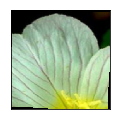

In [62]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))